# 直方图均衡化增强

In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

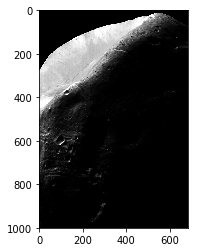

In [2]:
img=Image.open("dipum_images/dipum_images_ch03/Fig0310(a)(Moon Phobos).tif")
plt.figure()
plt.imshow(img)

0 255


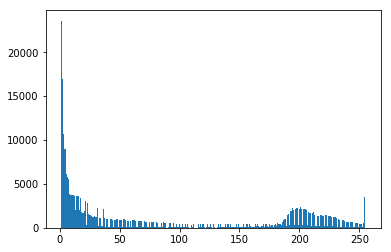

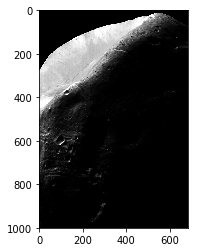

In [3]:
img_array=np.array(img)
print(img_array.min(),img_array.max())
plt.figure()
ar = img_array.flatten() 
plt.hist(ar,bins = 256,range=(1,255))

img_org = Image.fromarray(img_array)
plt.figure()
plt.imshow(img_org)

0 7


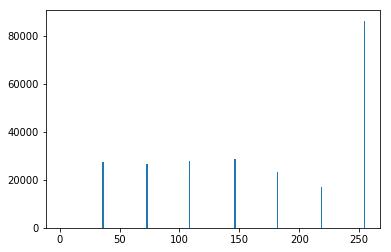

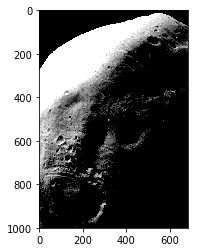

In [4]:
height=img_array.shape[0]
width=img_array.shape[1]
img_new=np.zeros((height,width),np.int)
for i in range(height):
    for j in range(width):
        if(img_array[i,j]!=0):
            img_new[i,j]=np.log2(img_array[i,j])
print(img_new.min(),img_new.max())   
minval=img_new.min()
maxval=img_new.max()
for i in range(height):
    for j in range(width):
        #img_new[i,j]=round(255*img_new[i,j]/7)
        img_new[i,j]=round(255*(img_new[i,j]-minval)/(maxval-minval))

plt.figure()
ar = img_new.flatten() 
plt.hist(ar,bins = 256,range=(1,255))
img_new = Image.fromarray(img_new)
plt.figure()
plt.imshow(img_new)

(1000, 683)


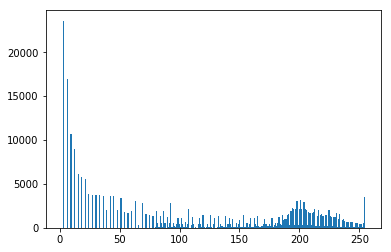

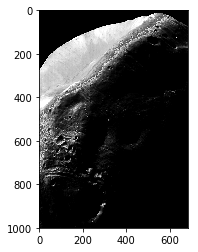

In [5]:
print(img_array.shape)
height=img_array.shape[0]
width=img_array.shape[1]
img_new_array=np.zeros((height,width),dtype=int)
for i in range(height):
    for j in range(width):
        if(img_array[i,j]<80):
            img_new_array[i,j]=img_array[i,j]*3
        else:
            img_new_array[i,j]=img_array[i,j]
            
plt.figure()
ar = img_new_array.flatten() 
plt.hist(ar,bins = 256,range=(1,255))
img_new = Image.fromarray(img_new_array)
plt.figure()
plt.imshow(img_new)

# 直方图均衡化

### 先计算每个亮度的像元数

In [6]:
#先计算每个亮度的像元数
hist={}
for i in range(height):
    for j in range(width):
        if(img_array[i,j] in hist):
            hist[img_array[i,j]]=hist[img_array[i,j]]+1
        else:
            hist[img_array[i,j]]=1
print(hist)       

{0: 421847, 1: 23596, 76: 76, 61: 847, 100: 456, 134: 381, 140: 415, 180: 457, 185: 316, 209: 1725, 198: 2246, 158: 451, 169: 174, 175: 423, 149: 430, 126: 406, 87: 605, 81: 684, 88: 570, 147: 419, 163: 414, 204: 2192, 218: 1470, 182: 507, 164: 182, 165: 430, 138: 450, 142: 414, 190: 1465, 156: 478, 170: 429, 112: 411, 124: 427, 245: 653, 255: 3498, 233: 1010, 202: 2196, 172: 423, 224: 211, 154: 109, 153: 485, 98: 486, 221: 197, 212: 1751, 193: 1939, 186: 651, 171: 142, 135: 49, 118: 432, 131: 54, 128: 428, 110: 373, 103: 433, 132: 414, 120: 428, 116: 412, 77: 635, 121: 35, 130: 23, 62: 859, 107: 423, 251: 488, 230: 1195, 246: 87, 205: 2111, 106: 54, 102: 35, 146: 74, 67: 812, 74: 38, 231: 1064, 254: 493, 236: 941, 183: 400, 139: 92, 105: 447, 143: 79, 85: 593, 108: 35, 194: 2210, 238: 758, 241: 706, 242: 80, 201: 2322, 159: 153, 93: 561, 99: 55, 63: 785, 184: 465, 248: 564, 192: 288, 174: 145, 213: 1435, 181: 179, 150: 71, 92: 581, 82: 600, 71: 721, 125: 57, 68: 746, 123: 42, 250: 88,

### 再计算每个亮度的概率

In [7]:
#求非零元素个数
mask=img_array>0
num=mask.sum()
print("L0 of data is:", num)
del hist[0] #删除0值
for key in hist.keys():
    hist[key]=hist[key]/num
print(hist) 

L0 of data is: 261153
{1: 0.09035316461997374, 76: 0.0002910171432072387, 61: 0.0032433094775859363, 100: 0.001746102859243432, 134: 0.0014589148889731307, 140: 0.0015891067688290005, 180: 0.0017499320321803693, 185: 0.0012100186480722029, 209: 0.00660532331621693, 198: 0.00860032241636129, 158: 0.0017269569945587452, 169: 0.0006662760910270991, 175: 0.0016197401523244995, 149: 0.0016465443628830608, 126: 0.0015546442123965645, 87: 0.0023166496268470973, 81: 0.0026191542888651482, 88: 0.00218262857405429, 147: 0.00160442346057675, 163: 0.0015852775958920633, 204: 0.008393547077766673, 218: 0.005628884217297906, 182: 0.0019413906790272369, 164: 0.0006969094745225979, 165: 0.0016465443628830608, 138: 0.001723127821621808, 142: 0.0015852775958920633, 190: 0.005609738352613219, 156: 0.0018303446638560537, 170: 0.0016427151899461236, 112: 0.0015737900770812511, 124: 0.001635056844072249, 245: 0.00250044992782009, 255: 0.013394446933406853, 233: 0.0038674646663067243, 202: 0.0084088637695144

### 排序后计算累计概率

In [8]:
sort_hist=sorted(hist.items())
#print(sort_hist)
sum_p=0 #累计概率
for i in sort_hist:
    sum_p=sum_p+i[1]
    hist[i[0]]=sum_p
    
#print(sorted(hist.items()))

### 用最大亮度255*各个累计概率，得到该亮度对应的新亮度值

In [9]:
for key in hist.keys():
    hist[key]=255*hist[key]
#print(sorted(hist.items()))

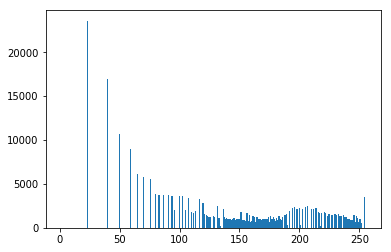

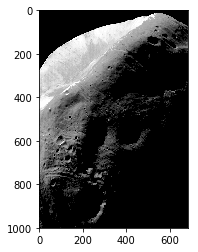

In [10]:
height=img_array.shape[0]
width=img_array.shape[1]
img_new_array=np.zeros((height,width),dtype=int)
for i in range(height):
    for j in range(width):
        if(img_array[i,j]!=0):
            img_new_array[i,j]=round(hist[img_array[i,j]])

plt.figure()
ar = img_new_array.flatten()
plt.hist(ar,bins = 256,range=(1,255))
img_new = Image.fromarray(img_new_array)
plt.figure()
plt.imshow(img_new)